# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*
лучше исталлировать через анаконду

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [89]:
import json

In [90]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [91]:
len(recipes)

39774

In [92]:
print (recipes[2])

{'cuisine': 'filipino', 'id': 20130, 'ingredients': ['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers']}


### Составление корпуса

In [93]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [94]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [146]:
list(recipes[:2]) #return the first two keys, items respectively:

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
   'black olives',
   'grape tomatoes',
   'garlic',
   'pepper',
   'purple onion',
   'seasoning',
   'garbanzo beans',
   'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
   'ground pepper',
   'salt',
   'tomatoes',
   'ground black pepper',
   'thyme',
   'eggs',
   'green tomatoes',
   'yellow corn meal',
   'milk',
   'vegetable oil']}]

In [95]:
print (texts[0])
print (corpus[0])

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [96]:
print(dictionary)


Dictionary(6714 unique tokens: ['fat free ground turkey breast', 'calf liver', 'reduced sodium smoked ham', 'red food coloring', 'wide egg noodles']...)


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [97]:
np.random.seed(76543)
# здесь код для построения модели:
lda = models.LdaModel(corpus=corpus, num_topics=40, passes=5)

In [98]:
lda_topics = lda.show_topics(40, 10, formatted=False)

In [99]:
lda.show_topics(40, 10, formatted=True)

[(0,
  '0.103*"26" + 0.054*"93" + 0.043*"53" + 0.042*"7" + 0.041*"96" + 0.036*"362" + 0.035*"231" + 0.034*"29" + 0.033*"16" + 0.031*"349"'),
 (1,
  '0.070*"1294" + 0.063*"1875" + 0.053*"494" + 0.050*"1170" + 0.049*"1069" + 0.041*"605" + 0.031*"156" + 0.028*"238" + 0.028*"1084" + 0.027*"867"'),
 (2,
  '0.096*"352" + 0.059*"979" + 0.056*"534" + 0.038*"569" + 0.037*"1229" + 0.035*"770" + 0.035*"1137" + 0.032*"522" + 0.028*"166" + 0.028*"293"'),
 (3,
  '0.107*"64" + 0.085*"16" + 0.056*"1" + 0.047*"13" + 0.046*"23" + 0.044*"210" + 0.035*"1074" + 0.034*"241" + 0.031*"317" + 0.023*"235"'),
 (4,
  '0.134*"228" + 0.071*"578" + 0.053*"989" + 0.049*"1037" + 0.046*"23" + 0.039*"475" + 0.034*"1296" + 0.033*"625" + 0.026*"842" + 0.024*"87"'),
 (5,
  '0.077*"840" + 0.062*"16" + 0.061*"472" + 0.058*"35" + 0.056*"32" + 0.055*"184" + 0.052*"7" + 0.033*"54" + 0.032*"11" + 0.032*"45"'),
 (6,
  '0.082*"28" + 0.066*"68" + 0.061*"140" + 0.032*"667" + 0.030*"18" + 0.030*"106" + 0.030*"837" + 0.028*"231" + 0.0

In [100]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

In [101]:
all_words = []
for topic in lda_topics:
    for word_freq in topic[1]:
        all_words.append(word_freq[0])

In [19]:
print(all_words)

['26', '93', '53', '7', '96', '362', '231', '29', '16', '349', '1294', '1875', '494', '1170', '1069', '605', '156', '238', '1084', '867', '352', '979', '534', '569', '1229', '770', '1137', '522', '166', '293', '64', '16', '1', '13', '23', '210', '1074', '241', '317', '235', '228', '578', '989', '1037', '23', '475', '1296', '625', '842', '87', '840', '16', '472', '35', '32', '184', '7', '54', '11', '45', '28', '68', '140', '667', '18', '106', '837', '231', '1004', '1638', '146', '92', '249', '141', '85', '97', '997', '307', '111', '342', '278', '16', '106', '102', '215', '116', '54', '29', '120', '14', '77', '16', '120', '106', '54', '391', '110', '78', '42', '14', '78', '309', '106', '57', '250', '54', '79', '36', '16', '14', '59', '16', '112', '72', '45', '68', '519', '54', '7', '469', '202', '714', '153', '567', '938', '394', '5', '803', '6', '1044', '24', '82', '16', '479', '227', '40', '216', '229', '354', '7', '488', '377', '129', '829', '681', '80', '633', '684', '1', '1681', '55

In [102]:
from collections import Counter
cnt = Counter(all_words)

In [20]:
print(cnt)

Counter({'16': 19, '29': 10, '7': 9, '53': 9, '54': 8, '1': 6, '40': 6, '106': 5, '14': 5, '11': 4, '78': 4, '23': 4, '18': 4, '121': 4, '231': 3, '203': 3, '45': 3, '312': 2, '36': 2, '50': 2, '26': 2, '49': 2, '120': 2, '372': 2, '32': 2, '70': 2, '68': 2, '28': 2, '13': 2, '96': 2, '3': 2, '51': 2, '37': 2, '130': 1, '1875': 1, '66': 1, '74': 1, '2': 1, '656': 1, '830': 1, '559': 1, '633': 1, '195': 1, '1177': 1, '792': 1, '41': 1, '452': 1, '10': 1, '274': 1, '979': 1, '446': 1, '95': 1, '190': 1, '1604': 1, '250': 1, '293': 1, '141': 1, '246': 1, '317': 1, '1137': 1, '494': 1, '650': 1, '989': 1, '85': 1, '188': 1, '1039': 1, '103': 1, '501': 1, '469': 1, '311': 1, '234': 1, '1296': 1, '176': 1, '35': 1, '867': 1, '233': 1, '1080': 1, '1008': 1, '144': 1, '60': 1, '338': 1, '364': 1, '193': 1, '577': 1, '277': 1, '1076': 1, '1004': 1, '309': 1, '33': 1, '458': 1, '1255': 1, '59': 1, '235': 1, '42': 1, '314': 1, '353': 1, '428': 1, '310': 1, '202': 1, '743': 1, '48': 1, '543': 1, '

In [103]:
words=["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]

In [43]:
print(str(dictionary.token2id))

{'fat free ground turkey breast': 5950, 'calf liver': 3995, 'reduced sodium smoked ham': 6369, 'red food coloring': 1832, 'wide egg noodles': 2460, 'black bean and corn salsa': 3277, 'Old El Paso™ refried beans': 5461, 'white wine': 313, 'duck breast halves': 1087, 'dill': 1151, 'stuffing': 686, 'Old El Paso™ mild red enchilada sauce': 1056, 'liquid sweetener': 6390, 'chicken base': 3284, 'beef jerky': 2934, 'zucchini blossoms': 5418, 'pickling cucumbers': 2845, 'wish bone red wine vinaigrett dress': 5281, 'chile powder': 222, 'crushed cheese crackers': 6713, 'candied fruit': 3172, 'eau de vie': 801, 'roasted unsalted cashews': 2689, 'chicken fingers': 1219, 'tortilla shells': 3279, 'thick-cut bacon': 1897, 'peaches in light syrup': 4875, 'honey roasted peanuts': 1981, 'asiago': 437, 'corned beef': 1510, 'cabernet': 4647, 'cola soft drink': 1603, 'Bartlett Pear': 5008, 'dashi kombu': 1158, 'hubbard squash': 5864, 'apricots': 1481, 'Ritz Crackers': 2854, 'dipping chocolate': 6127, 'crea

In [104]:
for word in words:    
    print (word, cnt[str(dictionary.token2id[word])])

salt 19
sugar 9
water 10
mushrooms 0
chicken 0
eggs 2


In [105]:
save_answers1(19,9,10,0,0,2)

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [46]:
import copy
dictionary2 = copy.deepcopy(dictionary)

In [60]:
print(dictionary2)
print(dictionary2[1])
print(dictionary2[1][0])

Dictionary(6702 unique tokens: ['fat free ground turkey breast', 'calf liver', 'reduced sodium smoked ham', 'red food coloring', 'wide egg noodles']...)
calf liver
c


__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [106]:
freq4000 = map(lambda it: it[0],filter(lambda it: it[1] > 4000, dictionary2.dfs.items()))#The method items() returns a list of dict's (key, value) tuple pairs

In [149]:
freq4000

In [107]:
dict_size_before = len(dictionary2)
dictionary2.filter_tokens(freq4000)
dict_size_after = len(dictionary2)
print ('before:', dict_size_before)
print ('after:', dict_size_after)

before: 6702
after: 6702


In [108]:
corpus_size_before = sum(map(lambda x: len(x),corpus))
corpus2 = [dictionary2.doc2bow(text) for text in texts]  # составляем корпус документов
corpus_size_after = sum(map(lambda x: len(x),corpus2))
print ('before:', corpus_size_before)
print ('after:', corpus_size_after)

before: 428249
after: 343665


In [109]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

In [65]:
save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [110]:
np.random.seed(76543)
# здесь код для построения модели:
lda2 = models.LdaModel(corpus=corpus2, num_topics=40, passes=5)

In [111]:
coher1 = lda.top_topics(corpus)

In [112]:
coher2 = lda2.top_topics(corpus2)

In [113]:
coherence1 = np.mean([x[1] for x in coher1])

In [114]:
coherence2 = np.mean([x[1] for x in coher2])

In [115]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

In [116]:
print(coherence1,coherence2)
save_answers3(coherence1, coherence2)

-635.642456934 -678.996332679


Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [117]:
lda2.get_document_topics(corpus2[0])

[(6, 0.50312499999999927),
 (28, 0.12812499999999979),
 (30, 0.12812499999999979),
 (31, 0.12812499999999979)]

Также выведите содержимое переменной *.alpha* второй модели:

In [118]:
lda2.alpha

array([ 0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025])

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [121]:
np.random.seed(76543)
# здесь код для построения модели:
lda3 = models.LdaModel(corpus=corpus2, num_topics=40, passes=5,alpha=1.0)

In [125]:
lda3.get_document_topics(corpus2, minimum_probability=0.01)                    
#Return topic distribution for the given document bow, as a list of (topic_id, topic_probability) 2-tuples.

In [169]:
lda3.get_document_topics(corpus[0])

[(0, 0.020498215090136954),
 (1, 0.020453118683976371),
 (2, 0.020408163265306121),
 (3, 0.040816326530612242),
 (4, 0.02040856235616767),
 (5, 0.020408201366100383),
 (6, 0.020421024935410641),
 (7, 0.040818734534525697),
 (8, 0.020424550749968719),
 (9, 0.020408163265306121),
 (10, 0.020408163265306121),
 (11, 0.040816326530612242),
 (12, 0.020408165241046852),
 (13, 0.020408163265306187),
 (14, 0.020408163265306121),
 (15, 0.020408163265336871),
 (16, 0.020408163265306121),
 (17, 0.020408163265306124),
 (18, 0.020408163265306242),
 (19, 0.040816326530612235),
 (20, 0.020447034463457591),
 (21, 0.040816326530612242),
 (22, 0.020414184406749469),
 (23, 0.061224489795918359),
 (24, 0.020442552288341739),
 (25, 0.040861878065569138),
 (26, 0.040295432997301886),
 (27, 0.020438487523846471),
 (28, 0.020408366618622862),
 (29, 0.020411252908205307),
 (30, 0.020408163273480648),
 (31, 0.020409412672160031),
 (32, 0.020473447071962522),
 (33, 0.020408567485906082),
 (34, 0.02040816326530612

In [172]:
def cnt_model (lda,corpus):
    cnt=0
    for corp in corpus:
        topics=lda.get_document_topics(corp,minimum_probability=0.01)
        cnt+=len(topics)
    return cnt

In [173]:
count_model2=cnt_model(lda2,corpus2)
count_model3=cnt_model(lda3,corpus2)

In [174]:
print(count_model2,count_model3)

201650 1590960


In [175]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

In [202]:
save_answers4(count_model2,count_model3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [127]:
theta=np.zeros([len(corpus2),40]) # n of topics =40

In [128]:
theta.shape

(39774, 40)

In [130]:
lda2.get_document_topics

<bound method LdaModel.get_document_topics of <gensim.models.ldamodel.LdaModel object at 0x10406b7b8>>

In [178]:
for i,j in enumerate(corpus2):
    for topic_id,prob in lda2.get_document_topics(j):
        theta[i,topic_id]=prob

In [187]:
cuisine_list=list(set([recipe["cuisine"] for recipe in recipes]))
print(cuisine_list)

['cajun_creole', 'thai', 'vietnamese', 'french', 'japanese', 'southern_us', 'jamaican', 'chinese', 'brazilian', 'moroccan', 'mexican', 'russian', 'irish', 'filipino', 'british', 'korean', 'spanish', 'indian', 'italian', 'greek']


In [185]:
y=np.array([recipe["cuisine"] for recipe in recipes])
print(y)
y.shape

['greek' 'southern_us' 'filipino' ..., 'irish' 'chinese' 'mexican']


(39774,)

In [189]:
clf=RandomForestClassifier(n_estimators=100)

In [191]:
accuracy=np.mean(cross_val_score(clf,theta,y,cv=3,scoring='accuracy'))

In [192]:
print(accuracy)

0.558959063116


In [193]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

In [194]:
save_answers5(accuracy)

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [ ]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print (w)

In [ ]:
generate_recipe(lda2,3)

### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [195]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [196]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [197]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

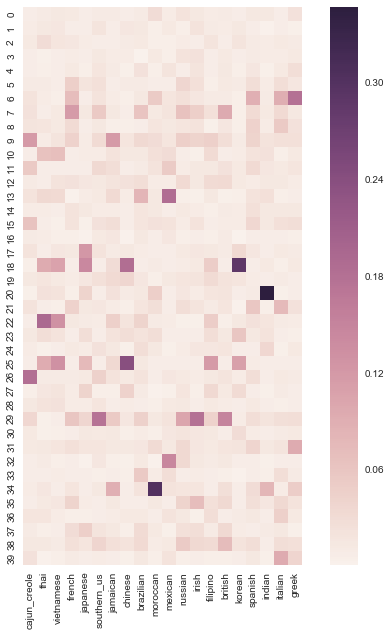

In [200]:
# Визуализируйте матрицу
plot_matrix(compute_topic_cuisine_matrix(lda2,corpus2,recipes))

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 